<h1 style=text-align:center;font-size:50px;color:darkslategray;> How to build your  first recommendation app with <b>streamlit 
    


# step 0:  Import necessary libraries

In [9]:
#import streamlit as st 
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
#from streamlit_lottie 
import json

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">Note : we cannot run steamlit code inside kaggle notebook you need to use other IDE like pycharm or vscode or swift etc mostly .py extension file ,so here we are not importing steamlit but you need to import when you try to run below code in your editor 

# step 1: drawing app layout 

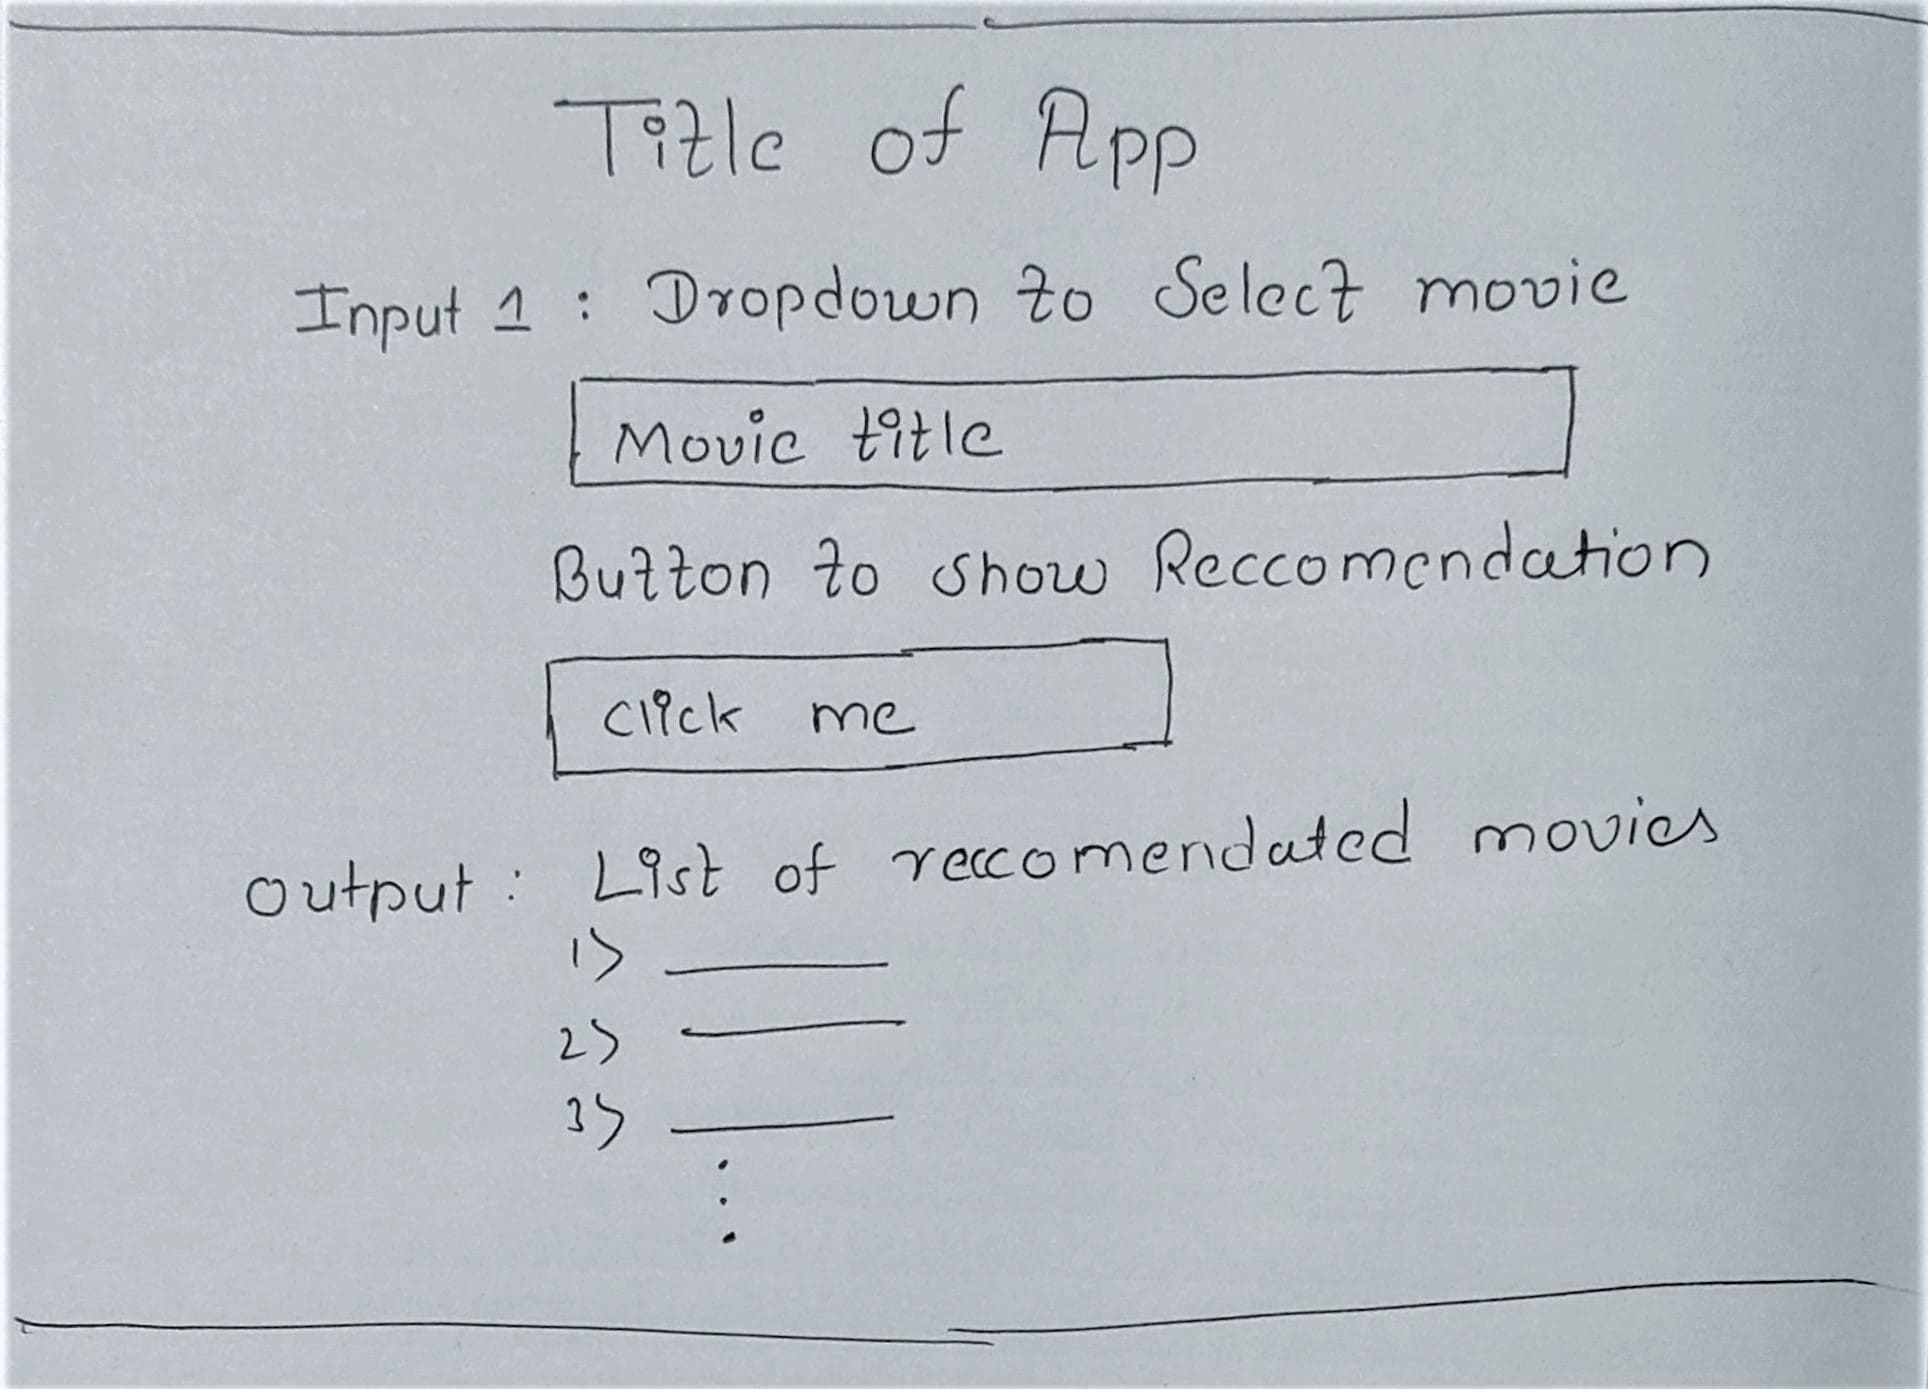

In [2]:
#####################################################################################################################

# step 2: building recommendation system

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:yellow; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;"> <b>credit</b>:This portion of notebook borrowed from KUTLUK ATALAY kaggle notebook<br>
notbook link : <b>https://www.kaggle.com/code/kutlukatalay/recommendation-system-for-netflix

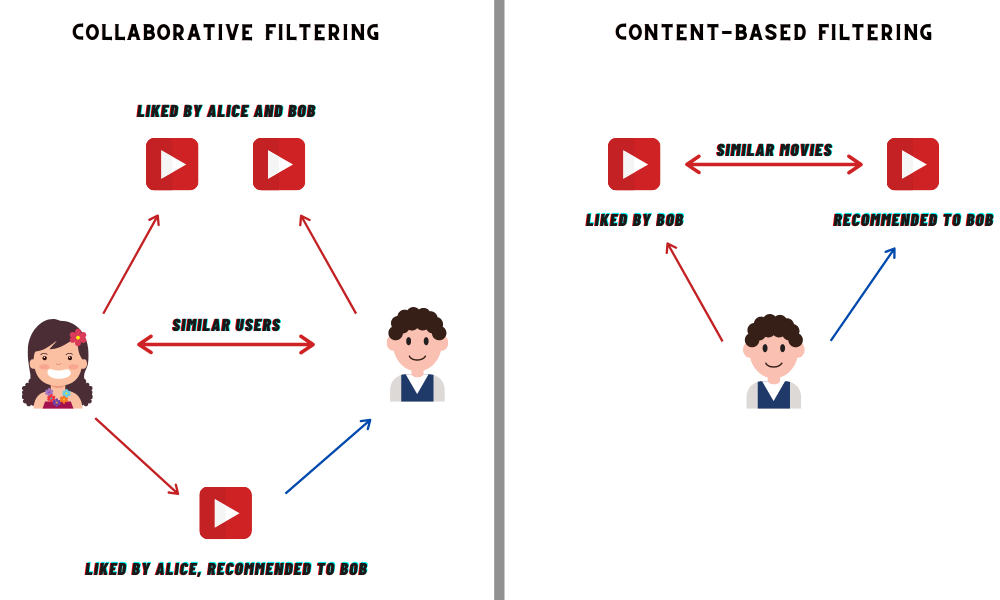

#### The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

[Recommendation Systems Source - 1](https://towardsdatascience.com/recommendation-systems-explained-a42fc60591ed)
[Recommendation Systems Source - 2](https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed)

In [18]:
df = pd.read_csv('netflix_titles.csv')
df.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">we need only two column form above dataset title and description  , with the help of common narrative and words in descrption we will build our simple recommendation system

In [22]:
#we are need only two column form above dataset 
df[['title','description']]

title                                        description
0      Dick Johnson Is Dead  As her father nears the end of his life, filmm...
1             Blood & Water  After crossing paths at a party, a Cape Town t...
2                 Ganglands  To protect his family from a powerful drug lor...
3     Jailbirds New Orleans  Feuds, flirtations and toilet talk go down amo...
4              Kota Factory  In a city of coaching centers known to train I...
...                     ...                                                ...
8802                 Zodiac  A political cartoonist, a crime reporter and a...
8803            Zombie Dumb  While living alone in a spooky town, a young g...
8804             Zombieland  Looking to survive in a world taken over by zo...
8805                   Zoom  Dragged from civilian life, a former superhero...
8806                 Zubaan  A scrappy but poor boy worms his way into a ty...

[8807 rows x 2 columns]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

netflix_data = df.copy()


tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])



### The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.


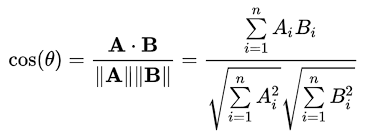

### Cosine similarity is a measure of similarity, often used to measure document similarity in text analysis.

In [43]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data[['title','description']].iloc[movie_indices]

In [30]:
get_recommendations('Grown Ups')

title                                        description
2674                Alelí  Mourning their father's death, a dysfunctional...
5687             Blue Jay  Two former high school sweethearts unexpectedl...
4119            The Break  A police detective mourning a painful loss mov...
154   Kuroko's Basketball  Five middle school basketball stars went to se...
2643             Love 101  While trying to make their teacher fall for a ...
3276     My MVP Valentine  An unfortunate accident alters the life of a h...
295      The Paper Tigers  After reuniting as middle-aged men, three kung...
2105                Hoops  A foul-mouthed high school basketball coach is...
1100      What Lies Below  Back home at her lake house, a teenager begins...
6510         Coach Carter  Controversial basketball coach Ken Carter puts...

In [8]:
########################################################################################################################

# step 3 : creating streamlit app

## 1] adding title 

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>st.header(A Really Simple Movie Recommendation System )

**output:**
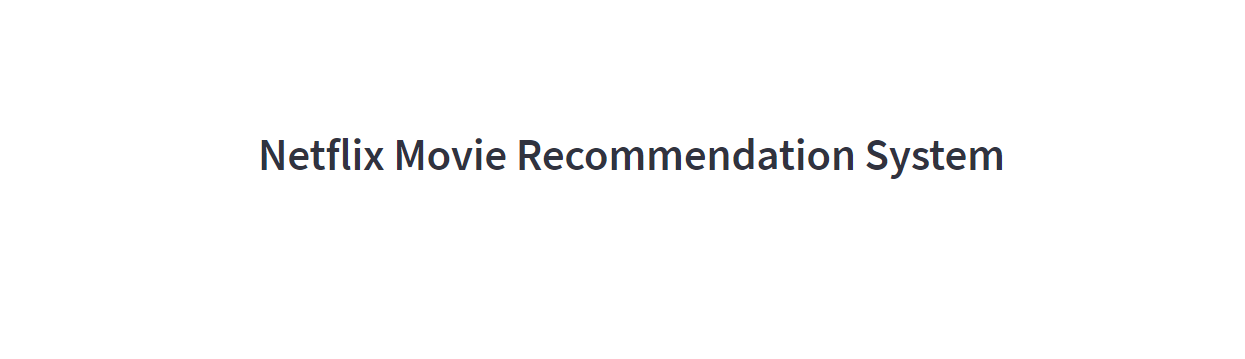

In [50]:
st.header('A Really Simple Movie Recommendation System')

2025-04-17 01:03:28.211 
  command:

    streamlit run C:\Users\nicol\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [52]:
streamlit run C:\Users\nicol\anaconda3\Lib\site-packages\ipykernel_launcher.py

SyntaxError: invalid syntax (888844694.py, line 1)

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">note : you can use other streamlit text components like st.title, st.subheadr,st.write, st.markdown etc<br>    
click the link to get more details :<b>https://docs.streamlit.io/library/api-reference/text

## 2] adding selectbox



In [45]:
movie_list = netflix_data['title'].values
movie_list # list of all movies in our dataset

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>selected_movie = st.selectbox(
    "Type or select a movie from the dropdown",
   <b> movie_list
)

**output:**
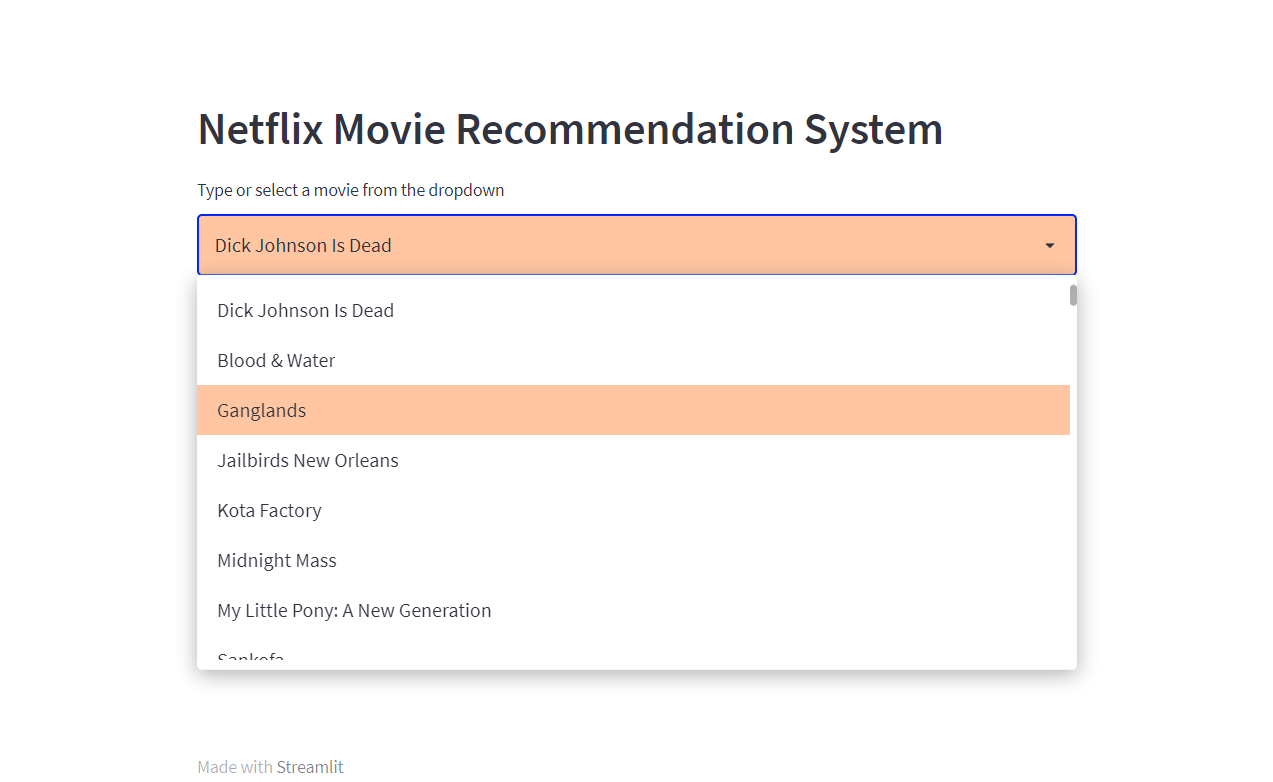

 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;">Note: suppose you want differnt inputs for you recommedation system like text , image , number , date , time you can use other stremlit input components <br>    
click the link to get more details :<b>https://docs.streamlit.io/library/api-reference/widgets     

## 3] adding button 

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>if st.button('Show Recommendation'):<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;recommended_movie_names = get_recommendations(<b>selected_movie</b>)<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;recommended_movie_names


**output:**
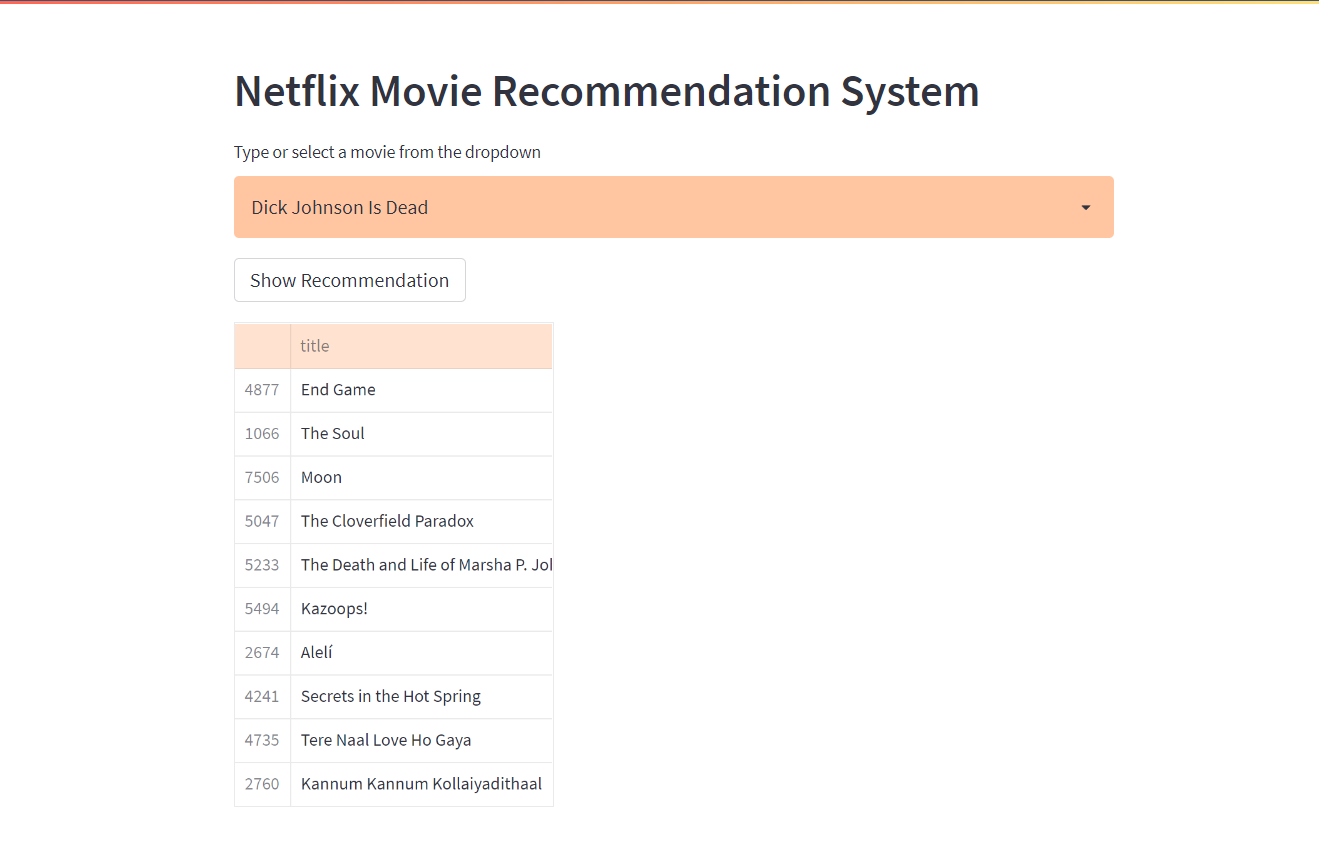

#### This app works fine but the list of recommendated titles looks little unattractive ,we will address this issue in next step 

In [10]:
########################################################################################################################

# step 4: adding customized elements to streamlit 

## 1] using plotly table inside streamlit app

In [11]:
def Table(df):
    fig=go.Figure(go.Table( columnorder = [1,2,3],
          columnwidth = [10,28],
            header=dict(values=[' Title','Description'],
                        line_color='black',font=dict(color='black',size= 19),height=40,
                        fill_color='#dd571c',#
                        align=['left','center']),
                cells=dict(values=[df.title,df.description],
                       fill_color='#ffdac4',line_color='grey',
                           font=dict(color='black', family="Lato", size=16),
                       align='left')))
    fig.update_layout(height=600, title ={'text': "Top 10 Movie Recommendations", 'font': {'size': 22}},title_x=0.5
                     )
    return fig.show()

In [12]:
Table(get_recommendations('Kota Factory'))

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;>if st.button('Show Recommendation'):<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;recommended_movie_names = get_recommendations(<b>selected_movie</b>)<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Table(recommended_movie_names)


 <h3 style="padding: 20px;text-align: left;font-size: 16px; border-radius:5px; background-color:powderblue; font-family: Comic Sans MS; color:black;word-spacing: 4px;line-height: 1.3 ;"> Note : we have just added Table function inside our if condition of button ,when we use Table function inside streamlit just make little change to our Table function return statement

<h3  style=color:#222222;padding:20px;text-align:left;border-radius:5px;background-color:#F1ABB9;> def Table(df):<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.......     <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.......     <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;.......    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return <b> st.plotly_chart(fig,use_container_width=True)

## 2] Adding lottie animation 

### lottie animation are really cool gif that make your app more attractive ,to use this 
*  <b>go to this site https://lottiefiles.com/
 
*  <b>download json file of the animation ,save it inside your working directory
*  <b>run below code 

In [13]:
"""
lottie_coding = load_lottiefile("m4.json")   # m4.json is name of our downloaded json file
st_lottie(
    lottie_coding,
    speed=1,
    reverse=False,
    loop=True,
    quality="low",height=220
)

"""

'\nlottie_coding = load_lottiefile("m4.json")   # m4.json is name of our downloaded json file\nst_lottie(\n    lottie_coding,\n    speed=1,\n    reverse=False,\n    loop=True,\n    quality="low",height=220\n)\n\n'

#### final app : https://rushikeshdane-netflix-movie-recommendation-system-app-fj0bt0.streamlitapp.com/

#### github link: https://github.com/rushikeshdane/Netflix-Movie-Recommendation-System

In [14]:
######################################################################################################################

# step 5 : app deployment

### for app deplyments follow this youtube video  https://youtu.be/sO4IKex53JY

#### for this particular app:

* <b>you can clone my github repo 
* <b>go to to https://streamlit.io/cloud ,create account
* <b>link your gitub to this account 
* <b>you just need to select github repo to deploy app on streamlit cloud

<h1 style="text-align: center;color:white;background-color:darkslategray;">  Please Upvote 👍 If You Liked this Notbook</h1>